# Задание

Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов.

— Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

# Матрица переходных вероятностей

In [1]:
import os, re
files = os.listdir()
war_and_peace = ''
for file in files:
    if file.startswith('tom'):
        with open(file,'r',encoding='utf8') as f:
            war_and_peace += re.sub('[^а-я]','',f.read().lower())

In [2]:
war_and_peace[:100]

'левтолстойвойнаимиртомтомчастьперваячастьораячастьтретьятомлевниколаевичтолстойвойнаимиртомчастьперв'

In [12]:
len(war_and_peace)

2299965

In [4]:
RUS = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUS)}

In [5]:
import numpy as np
proba = np.zeros((len(RUS),len(RUS)))

In [6]:
for a,b in zip(war_and_peace[:-1],war_and_peace[1:]):
    proba[POS[a],POS[b]]+=1

In [16]:
proba = (proba / proba.sum(axis=1)[:, None])

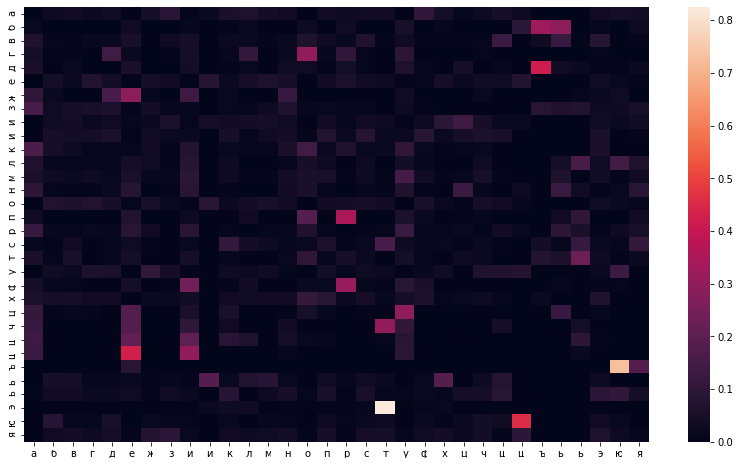

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(proba, index=(c for c in RUS), columns=(c for c in RUS))
plt.figure(figsize=(14,8))
sns.heatmap(df)
_ = plt.show()

# Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [18]:
start = 'п'
end = 'р'
prior = 1. / len(RUS)

proba_  = 0
for ca in RUS:
    for cb in RUS:
        proba_ += prior * proba[POS[start], POS[ca]] * proba[POS[ca],POS[cb]] * proba[POS[cb], POS[end]]
if proba_ > 0:
    print(f"Можно встретить последовательность 'п**р' с вероятностью: {proba_:6f} ")

Можно встретить последовательность 'п**р' с вероятностью: 0.001194 


# Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [19]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length-1):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUS), p=proba[index])
    s.append(next_char)

print (''.join(s))

быльэтам


# Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM

In [22]:
from hmmlearn.hmm import GaussianHMM

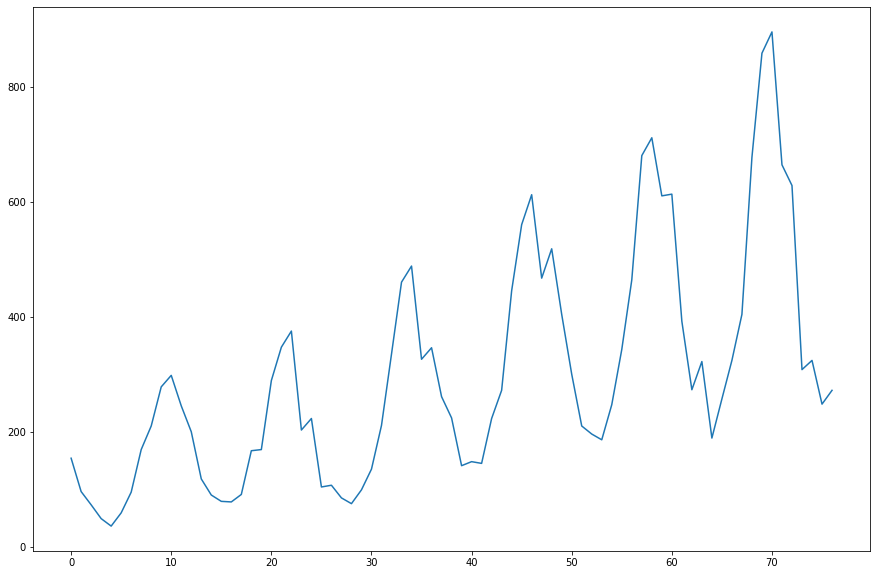

In [25]:
series = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")["Count"]
series = series.dropna()
plt.figure(figsize=(15,10))
_ = plt.plot(series)

In [26]:
series = series.values.reshape(-1,1)

In [27]:
for n in range(3,5):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(series)
    print (n, model.score(series))

3 -465.4758943249864
4 -454.54532730630314


In [28]:
def train_and_plot_hmm (n_comp):
    model = GaussianHMM(n_components=n_comp,
                            covariance_type="diag",
                            n_iter=1000)
    model.fit(series)
    labels = model.predict(series)
    means = np.zeros_like(series)
    for i in range(model.n_components):
        means[labels == i] = model.means_[i]

    plt.figure(figsize=(12, 6))
    plt.plot(series)
    _ = plt.plot(means, linewidth=3)
    
    print(f"MAE = {np.sum(np.abs(series-means)):.2f}")
    
    return model

MAE = 4638.00


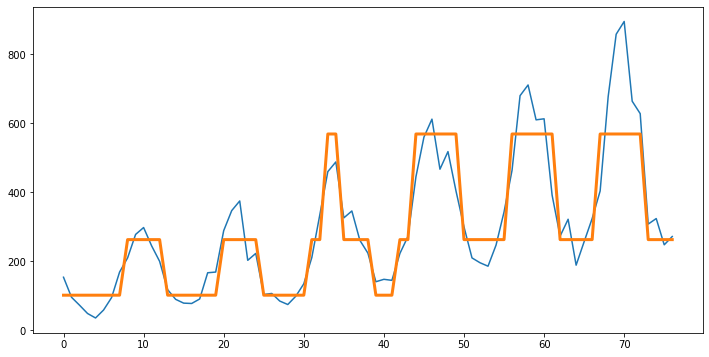

In [29]:
mdl = train_and_plot_hmm(3)

MAE = 3845.00


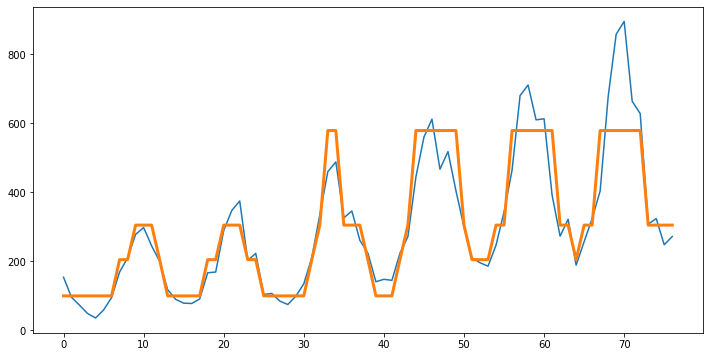

In [30]:
mdl = train_and_plot_hmm(4)

Fitting a model with 79 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 98 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 119 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 142 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 167 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 223 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 254 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 287 free scalar parameters with only 77 data points will result in a degenerate solution.
Fitting a model with 322 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 359 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 398 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 439 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 482 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 527 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 574 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 623 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 674 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 727 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 782 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 839 free scalar parameters with only 77 data points will result in a degenerate solution.


Fitting a model with 898 free scalar parameters with only 77 data points will result in a degenerate solution.


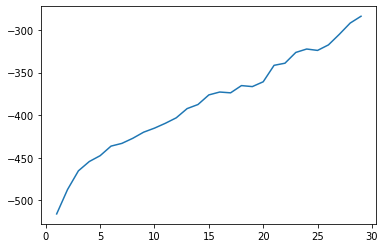

In [31]:
ids = []
scores = []
for n in range(1,30):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(series)
    ids.append(n)
    scores.append(model.score(series))
    
    print(n,end='\r')

_ = plt.plot(ids,scores)

In [32]:
scores = np.array(scores)
ids = np.array(ids)
ids[np.argmin(scores[1:] > scores[:-1])]

16

Fitting a model with 287 free scalar parameters with only 77 data points will result in a degenerate solution.


MAE = 1551.00


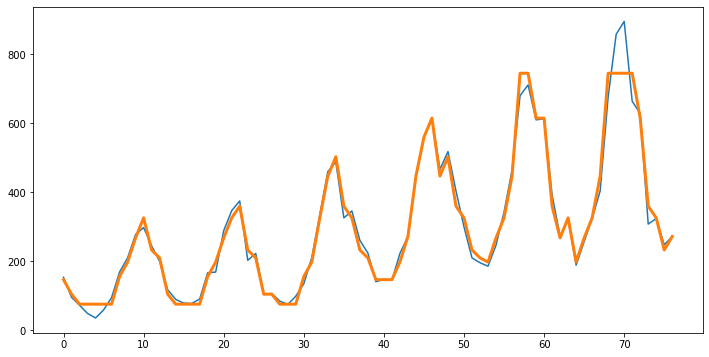

In [33]:
mdl = train_and_plot_hmm(16)

In [34]:
def predict_and_plot_hmm (model,n_predictions):
    
    predictions = []
    labels = model.predict(series)
    
    last_state = labels[-1]
    print(f"Intial state {last_state}")
    for n in range(n_predictions):        
        next_state = np.random.choice(np.arange(model.n_components),p=model.transmat_[last_state])
        if last_state != next_state:
            print(f"Changing from {last_state} to {next_state} at {n+1}")
        predictions.append(model.means_[next_state])
        last_state = next_state

    plt.figure(figsize=(15, 10))
    plt.plot(range(len(series)+n_predictions),list(series.reshape(-1))+[None]*n_predictions)
    plt.plot(range(len(series)+n_predictions),[None]*len(series)+predictions)
    #_ = plt.plot(means, linewidth=3)
    
    return predictions

Intial state 2
Changing from 2 to 10 at 1
Changing from 10 to 1 at 2
Changing from 1 to 6 at 3
Changing from 6 to 12 at 4
Changing from 12 to 8 at 5
Changing from 8 to 5 at 6
Changing from 5 to 11 at 7
Changing from 11 to 15 at 8
Changing from 15 to 9 at 9
Changing from 9 to 0 at 10
Changing from 0 to 14 at 11
Changing from 14 to 12 at 12
Changing from 12 to 6 at 13
Changing from 6 to 12 at 14
Changing from 12 to 10 at 15
Changing from 10 to 4 at 16
Changing from 4 to 7 at 22
Changing from 7 to 10 at 23
Changing from 10 to 1 at 24
Changing from 1 to 6 at 25
Changing from 6 to 12 at 26
Changing from 12 to 8 at 27
Changing from 8 to 2 at 28
Changing from 2 to 10 at 29
Changing from 10 to 1 at 30
Changing from 1 to 6 at 31
Changing from 6 to 8 at 32
Changing from 8 to 5 at 33
Changing from 5 to 3 at 34
Changing from 3 to 11 at 35
Changing from 11 to 15 at 36
Changing from 15 to 9 at 37
Changing from 9 to 0 at 38
Changing from 0 to 14 at 39
Changing from 14 to 12 at 40
Changing from 12 to 

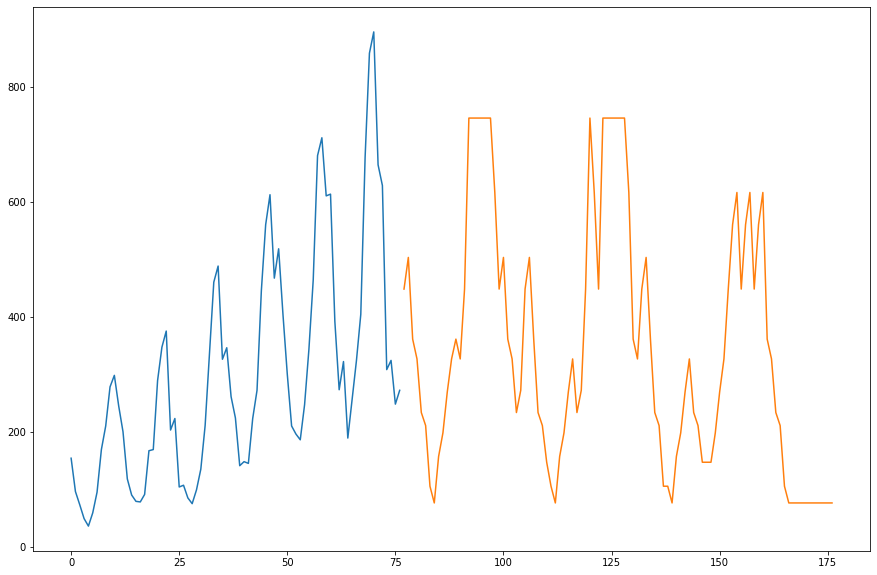

In [35]:
predictions = predict_and_plot_hmm(mdl,100)

In [36]:
mdl.transmat_[2,2]

0.0